# NLP : Sentiment analysis of tweets 

This task focuses heavily on text processing. The data source for this task is a 1-month collection of twitter tweets (July 1 2019 - July 31 2019) throughout London. Each tweet contains a text field with content posted by a user.

## *Data Overview*

*The core field to focus on is extended_text, which contains the full post by the user in its raw format (no processing has been done). Overall there are 374K tweets provided in CSV format with the following fields:*

 *  _id : Twitter tweet Identifier
 *  coordinates : Coordinates label attached by the user of the tweet 
 *  created_at : String human-readable timestamp
 *  timestamp_ms : milliseconds Unix timestamp of the tweet.
 *  extended_text : the full-text body of the tweet (raw text data you may want to do some preprocessing)
 *  bounding_box.coordinates : an associated place polygon of the tweet.

## *Methodology and Implementation*

### *Pre-processing*

Raw tweets extracted from twitter generally results into a noisy dataset. So before we feed the data to a model or a classification technique, it is mandatory to remove all the irrelevant words from the collection. This helps to reduce the complexity of the classification procedure.  Following steps are taken as part of pre-processing.

1. All the stop words (like 'a',  'about',  'above',  'after',  'again',  'against' ) are removed from the collection of data.
2. Usage of Punctuations are also ignored as it doesn't contribute much to the text analytics procedure we follow.
3. As we are dealing with sentiment analysis / text classification of tweets, the numbers involved in the texts are not much influential. Hence we can neglect its occurence from the tweets involved.
4. Removing URLs from the texts.


In [2]:
#Load libraries
import csv
from textblob import TextBlob
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
import nltk.stem as stemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np


In [3]:
import nltk.stem as stemmer

In [6]:
# Download Repository
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
#Set working directory
os.chdir("C:/Users/Karthik/Downloads/twitter_july_2019_sample_v2")

In [5]:
#Load Text data
post = pd.read_csv("popertee_twitter_july_2019_sample_v2.csv",delimiter="|")
post = post[pd.notnull(post['extended_text'])]

In [6]:
# Extract stop words
stop = set(stopwords.words("english"))

# Remove punctuation marks
exclude = set(string.punctuation)

## *Approaches*

Text classification can be mainly done in two ways.

* Supervised methods (when we have labelled dataset
* Unsupervised methods (when we dont have a labelled dataset) 

Here we selected major topics by analysing the word cloud of all hashtagged words in the dataset. Then we considered a subset of the original dataset such that the subset contains all the tweets related to the selected topics.  So basically we follow a supervised method by labelling the tweets involved in the subset.

## *Approach A*

In [7]:
# extracting hashtagged words from the dataset
import re
m=[]
for i in range(0,post.shape[0]):
    tmp=re.findall(r'[#]\w+',post.iloc[i,5])
    if(tmp!=[]):
        m.append(tmp)
flattened_list = [y for x in m for y in x]

### *WordCloud of hastagged words*

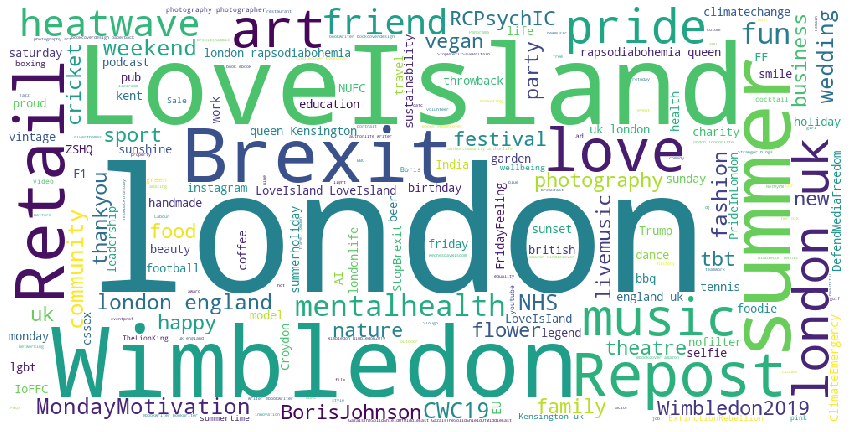

In [27]:
#Plotting wordcloud for hashtagged words/topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(flattened_list))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**From the word cloud, it is found that the most frequent hashtagged words appearing in the given dataset are 
"#LoveIsland", "#Wimbledon", "#Brexit", "#Repost", "#Summer", "#heatwave", "#london".**

In [8]:
# Getting index of tweets coming under different topics
loveisland,wimbledon,brexit,repost,summer,heatwave,london=[],[],[],[],[],[],[]
hashtag1,hashtag2,hashtag3,hashtag4,hashtag5,hashtag6,hashtag7="#LoveIsland","#Wimbledon","#Brexit","#Repost","#Summer","#heatwave","#london"
for i in range(0,post.shape[0]):
    ht=re.findall(r'[#]\w+',post.iloc[i,5])
    if hashtag1 in ht:
        loveisland.append(i)
    if hashtag2 in ht:
        wimbledon.append(i)
    if hashtag3 in ht:
        brexit.append(i)
    if hashtag4 in ht:
        repost.append(i)
    if hashtag5 in ht:
        summer.append(i)
    if hashtag6 in ht:
        heatwave.append(i)
    if hashtag7 in ht:
        london.append(i)

In [9]:
#total number of tweets with hashtags
print("total number of tweets with hashtag:",len(m))

total number of tweets with hashtag: 139861


In [10]:
print("total number of tweets with hashtag-LoveIsland:",len(loveisland))
print("total number of tweets with hashtag-Wimbledon:",len(wimbledon))
print("total number of tweets with hashtag-Brexit:",len(brexit))
print("total number of tweets with hashtag-Repost:",len(repost))
print("total number of tweets with hashtag-Summer:",len(summer))
print("total number of tweets with hashtag-heatwave:",len(heatwave))
print("total number of tweets with hashtag-london:",len(london))

total number of tweets with hashtag-LoveIsland: 1027
total number of tweets with hashtag-Wimbledon: 1329
total number of tweets with hashtag-Brexit: 877
total number of tweets with hashtag-Repost: 545
total number of tweets with hashtag-Summer: 179
total number of tweets with hashtag-heatwave: 438
total number of tweets with hashtag-london: 6194


From the count of tweets under different topics, we can see that most of the tweets which have real information are missing. This will affect our analysis tremendously. So it is mandatory to consider all the tweets which discuss the mentioned topics as shown above.

In [11]:
# considering the tweets without hashtags

# getting the index of tweets of loveisland,wimbledon,brexit,repost,summer,heatwave,london
loveisland,wimbledon,brexit,repost,summer,heatwave,london=[],[],[],[],[],[],[]
def clean(doc,count):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free.lower() if ch not in exclude])
    num_free = "".join(i for i in punc_free if not i.isdigit())
    http_free= " ".join(ch for ch in num_free.split() if ch not in re.findall(r"http\w+",num_free))

    if "wimbledon" in re.findall(r'[w]\w+',http_free):
        wimbledon.append(count)
    if "loveisland" in re.findall(r'[l]\w+',http_free):
        loveisland.append(count)
    if "brexit" in re.findall(r'[b]\w+',http_free):
        brexit.append(count)
    if "repost" in re.findall(r'[r]\w+',http_free):
        repost.append(count)
    if "summer" in re.findall(r'[s]\w+',http_free):
        summer.append(count)
    if "heatwave" in re.findall(r'[h]\w+',http_free):
        heatwave.append(count)
    if "london" in re.findall(r'[l]\w+',http_free):
        london.append(count)
for i in range(0, post.shape[0]):
    clean(post.iloc[i,5],i)

In [12]:
print("total number of tweets with word-LoveIsland:",len(loveisland))
print("total number of tweets with word-Wimbledon:",len(wimbledon))
print("total number of tweets with word-Brexit:",len(brexit))
print("total number of tweets with word-Repost:",len(repost))
print("total number of tweets with word-Summer:",len(summer))
print("total number of tweets with word-heatwave:",len(heatwave))
print("total number of tweets with word-london:",len(london))

total number of tweets with word-LoveIsland: 2520
total number of tweets with word-Wimbledon: 4035
total number of tweets with word-Brexit: 6887
total number of tweets with word-Repost: 1028
total number of tweets with word-Summer: 7333
total number of tweets with word-heatwave: 948
total number of tweets with word-london: 35048


**The above count of data seems to be realistic and we can now apply sentiment analysis on each topics.**

### *Sentiment Analysis*

We apply sentiment analysis of the dataset using a package called 'VADER' (Valence Aware Dictionary and Sentiment Reasoner), It is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative. We will use the polarity_scores() method to obtain the polarity indices for the given sentence. The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. The polarity value ranges between -1 and 1. 

 + If the polarity of tweet is less than 0 , we categorize it as a negative emotion.
 + If the polarity of tweet is greater than 0 , we categorize it as a positive emotion.
 + If the polarity of tweet is equal to 0 , we categorize it as a neutral emotion.

Using this technique, we calculated the number of tweets which have positive review, negative review and neutral review by the users. The code for the same is implemented below and sentiment analysis is applied for all the major topics - "loveisland","wimbledon","brexit","repost","summer","heatwave","london" that we found earlier.


### *WHY VADER?*
 + It works exceedingly well on social media type text, yet readily generalizes to multiple domains
 + It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
 +  It does not severely suffer from a speed-performance tradeoff.
 +  Handles Emojis, Slangs and Emoticons.


In [13]:
# Sentiment Analysis using Vader : 
loveisland_Vader,wimbledon_Vader,brexit_Vader,repost_Vader,summer_Vader,heatwave_Vader,london_Vader = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
ind=[loveisland,wimbledon,brexit,repost,summer,heatwave,london]
nameind=["loveisland","wimbledon","brexit","repost","summer","heatwave","london"]
datfrm=[loveisland_Vader,wimbledon_Vader,brexit_Vader,repost_Vader,summer_Vader,heatwave_Vader,london_Vader]

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for j in range(0,7):
    for i in ind[j]:

        snt = analyzer.polarity_scores(post.iloc[i,5])

        temp = pd.DataFrame({'Comments': post.iloc[i,5], 'Polarity': list(snt.items())[3][1]}, index = [0])

        datfrm[j] = datfrm[j].append(temp)    

    negative_count=0
    positive_count=0

    for i in range(0,len(ind[j])):
        if(float(datfrm[j].iloc[i,1])<0.0):
            negative_count=negative_count+1 #getting the count of negative tweets
        elif(float(datfrm[j].iloc[i,1])>0.0):
            positive_count=positive_count+1  #getting the count of positive tweets
 
    # favours loveisland 
    print("Count of tweets : ",positive_count,", which favour ",nameind[j])
    
    # disfavours loveisland
    print("Count of tweets : ",negative_count,", which disfavour ",nameind[j])
    
    # neutralopinion on loveisland
    print("Count of tweets : ",(len(ind[j])-positive_count-negative_count),", which have neutral view on ",nameind[j])

Count of tweets :  1505 , which favour  loveisland
Count of tweets :  833 , which disfavour  loveisland
Count of tweets :  182 , which have neutral view on  loveisland
Count of tweets :  2863 , which favour  wimbledon
Count of tweets :  537 , which disfavour  wimbledon
Count of tweets :  635 , which have neutral view on  wimbledon
Count of tweets :  3372 , which favour  brexit
Count of tweets :  3067 , which disfavour  brexit
Count of tweets :  448 , which have neutral view on  brexit
Count of tweets :  711 , which favour  repost
Count of tweets :  104 , which disfavour  repost
Count of tweets :  213 , which have neutral view on  repost
Count of tweets :  5404 , which favour  summer
Count of tweets :  654 , which disfavour  summer
Count of tweets :  1275 , which have neutral view on  summer
Count of tweets :  596 , which favour  heatwave
Count of tweets :  173 , which disfavour  heatwave
Count of tweets :  179 , which have neutral view on  heatwave
Count of tweets :  24029 , which favo

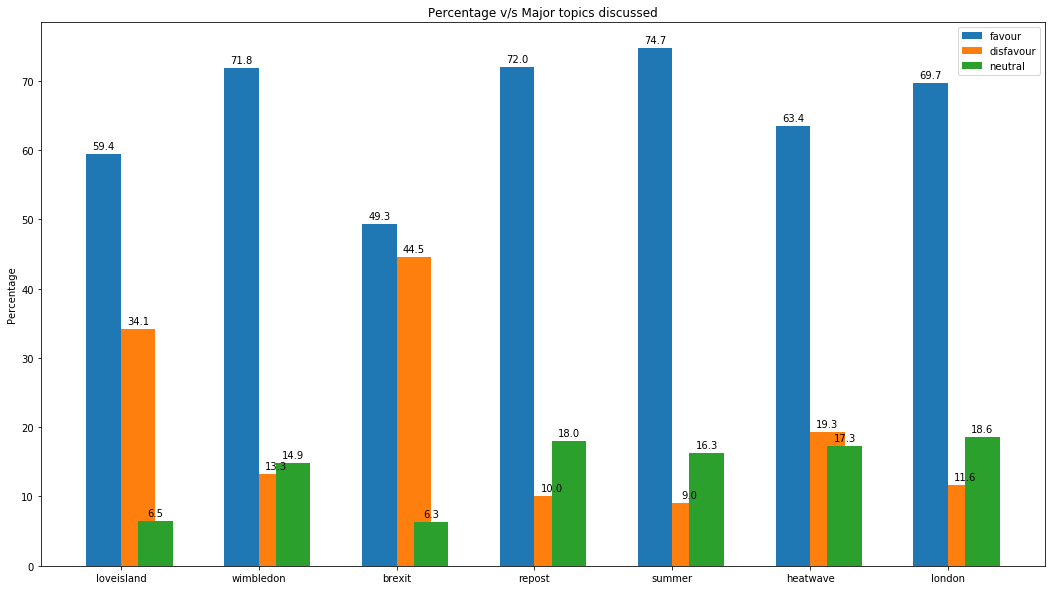

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ["loveisland","wimbledon","brexit","repost","summer","heatwave","london"]
favour = [round(149600/len(loveisland),1) , round(289700/len(wimbledon),1) , round(339200/len(brexit),1), round(74000/len(repost),1), round(547800/len(summer),1), round(60100/len(heatwave),1), round(2443400/len(london),1)]
disfavour = [round(86000/len(loveisland),1) , round(53600/len(wimbledon),1) , round(306200/len(brexit),1), round(10300/len(repost),1), round(65700/len(summer),1), round(18300/len(heatwave),1) , round(407800/len(london),1)]
neutral = [round(16400/len(loveisland),1), round(60200/len(wimbledon),1), round(43300/len(brexit),1), round(18500/len(repost),1), round(119800/len(summer),1), round(16400/len(heatwave),1), round(653600/len(london),1)]
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x - width/2, favour, width, label='favour')
rects2 = ax.bar(x + width/2, disfavour, width, label='disfavour')
rects3 = ax.bar(x + width, neutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage v/s Major topics discussed')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()
plt.savefig('sentiment_supervised.png', dpi=200) #save figure

All the major topics discussed by twitter users has an overall positive sentiment. But when it comes to brexit, we can see that 44.5 % tweets have negative sentiment on the topic.

From the word cloud, the only personality that we can find is "Boris Johnson" . The sentiment analysis of tweets,in which 'boris johnson' involved, is done below.

In [299]:
boris=[] # Collecting index of tweets which have the word boris.
 
for i,j in enumerate(post_corpus):
    for ch in j.split():
        if ch in re.findall(r"boris\w+",j):
            boris.append(i)

# Sentiment Analysis using Vader 
 
boris_Vader = pd.DataFrame()
# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in boris:
    snt = analyzer.polarity_scores(post.iloc[i,5])
    temp = pd.DataFrame({'Comments': post.iloc[i,5], 'Polarity': list(snt.items())[3][1]}, index = [0])
    boris_Vader = boris_Vader.append(temp)    
negative_count=0
positive_count=0

for i in range(0,len(boris)):
    if(float(boris_Vader.iloc[i,1])<0.0):
        negative_count=negative_count+1
    elif(float(boris_Vader.iloc[i,1])>0.0):
        positive_count=positive_count+1

# favours loveisland
print("% of tweets which favours boris johnson:",positive_count/len(boris))

# disfavours loveisland
print("% of tweets which disfavours boris johnson:",negative_count/len(boris))

# neutralopinion on loveisland
print("% of tweets which have neutral opinion on boris johnson:",(len(boris)-positive_count-negative_count)/len(boris))


% of tweets which favours boris johnson: 0.49566509784493434
% of tweets which disfavours boris johnson: 0.41094872430022295
% of tweets which have neutral opinion on boris johnson: 0.09338617785484271


In [258]:
# Text pre processing to reduce complexity

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free.lower() if ch not in exclude])
    num_free = "".join(i for i in punc_free if not i.isdigit())
    http_free= " ".join(ch for ch in num_free.split() if ch not in re.findall(r"http\w+",num_free))
    return http_free
post_corpus = [clean(post.iloc[i,5]) for i in range(0, post.shape[0])]

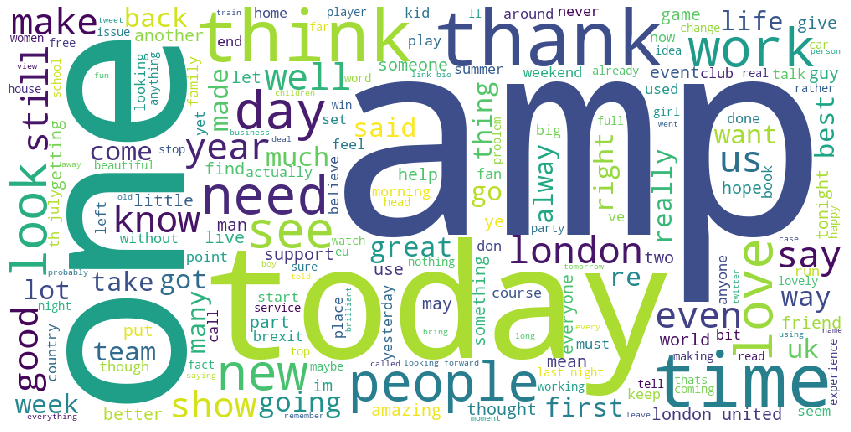

In [298]:
#Plot wordcloud for all topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(post_corpus))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Surprised by seeing the word 'amp' in the wordcloud?? No worries... It is just coding representation of '&' . It is still appearing as one of the most occured words in the word cloud because &amp; is not included as a stop word. While extracting tweets from twitter, the symbol '&'  is usually corrected to & amp; because of following reasons
& is HTML for "Start of a character reference".
& amp; is the character reference for "An ampersand".

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# labelling the dataset 
fdat=pd.DataFrame()
for j in range(0,7):
    for i in ind[j]:
        temp = pd.DataFrame({'Comments': post_corpus[i], 'Class': nameind[j]}, index = [0])
        fdat=fdat.append(temp)    
fdat

,Comments,Class
0,can’t lie missing many episodes loveisland awa...,loveisland
0,days without sex… nobody literally nobody anto...,loveisland
0,drbolton hope amber finds someone would wake m...,loveisland
0,lookingforlewys michael appears suffering seve...,loveisland
0,benchidleyyt amber called right start said you...,loveisland
0,sonmanpskaur joanna im worried michael appears...,loveisland
0,jamescott daddyraven loveisland no know favour...,loveisland
0,ashtaoriginal amber called right start said yo...,loveisland
0,loveisland yeah well like surprises michael he...,loveisland
0,randaaimour amber called right start said you ...,loveisland


In [45]:
# splitting the labelled dataset into test and train 
from sklearn.model_selection import train_test_split
train,test = train_test_split(fdat,test_size= 0.25)

###  *Vectorize the tweets*

Vectorizing the text is what allows us to have numerical representation of text that we can work with. To vectorize text is to represent text as numerical vectors. An implication of this representation is that each word is considered as a feature. The angle between two vectors is equal to the dot product of the two vectors divided by the magnitude of them. This angle can be regarded as a testament to how similar two vectors are. Similar method is applied in the case of texts as well in order to find the similarities among them. This is the base of vectorization and applying this on a large dataset has its own difficulties. Initial step is to create a vocabulary set for all the tweets involved. Then we represented each sentence as a vector where each index corresponds to the index in the vocabulary set, where the number is how many times the word occurs in that sentence. 

###  *N grams Model*

Here we followed one gram model such that each gram of a tweet contains only one word. If it is two gram model, each gram of a tweet contains 2 words. This distribution of words helps to distinguish the text- "Car was cleaned by John." from the text - "John was cleaned by Car.". In one gram model, both texts have same vector representaion which is not desirable. This n-gram model is integrated in most document classification tasks and it almost always boosts accuracy. This is because the n-gram model lets you take into account the sequences of words in contrast to what just using singular words (unigrams) will allow you to do. But This may depend upon the type of corpus that we are dealing with. Sometimes we may get corpuses that works well with one gram model, usually when the size dataset is small and texts involved in each document are not long. In addition to that, it may depend upon the type of machine learning algorithm we implement. Here, We can see that all algorithms except MultinomialNB works better on one gram model.

###  *TDF-IDF*

Consider two sentences "This movie is bad" and  "This movie is good". These two sentences, objectively speaking, is pretty similar. They have most of the words in common except for just one word. That one word (“good”, “bad”) changes its category dramatically. But with our current model, our classifiers take each word as seriously as it does with every other word, which is to say that each word is considered the same, when it should really be that the word “good” and “bad” should be considered more. This is where TF-IDF weighting comes in and it is a very popular and standard tool in document classification. It stands for Term Frequency-Inverse Document Frequency. This technique helps to increase the significance for certain words in a sentence/document by considering the occurence of that word in the entire collection of documents. If a word in a document is occuring more in other documents as well, then we can say that the selected word is less significant. On the other hand, if a word in a document is occured less in other documents, then the word can be considered as a significant one.


In [53]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# Initialize the TFIDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the training data
X_train = vectorizer.fit_transform(train['Comments'])

# Vectorize the testing data
X_test = vectorizer.transform(test['Comments'])

# Train the SVM, optimized by Stochastic Gradient Descent 
clf.fit(X_train, train['Class']) # train_corpus_target is the correct values for each training data.

# Make predictions
pred = clf.predict(X_test)

In [54]:
import os
import codecs
from sklearn import feature_extraction

In [55]:
# building confusion matrix to analyse the predictions with actual values

from sklearn.metrics import confusion_matrix
confusion_matrix(test['Class'].tolist(),pred.tolist())

array([[1679,    0,   62,    2,    0,    4,    2],
       [   1,  162,   46,    1,    0,   21,    0],
       [  49,   41, 8198,   11,   33,  316,   70],
       [   0,    0,    3,  612,    0,    3,    0],
       [   0,    1,   12,    0,  229,    6,    3],
       [   2,   18,  123,    1,    6, 1689,   15],
       [   2,    1,   37,    0,    1,   10,  978]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(test['Class'].tolist(),pred.tolist())

0.9375086505190311

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

In [58]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(2,2),norm=None)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

# train the model using X_dtm & y
NB_pipeline.fit(train['Comments'], train['Class'])

# compute the testing accuracy
prediction = NB_pipeline.predict(test['Comments'])
print('Test accuracy is {}'.format(accuracy_score(test['Class'], prediction)))

Test accuracy is 0.7945328719723184


In [59]:
from sklearn.svm import LinearSVC

In [62]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
# train the model using X_dtm & y
SVC_pipeline.fit(train['Comments'], train['Class'])
# compute the testing accuracy
prediction = SVC_pipeline.predict(test['Comments'])
print('Test accuracy is {}'.format(accuracy_score(test['Class'], prediction)))

Test accuracy is 0.9192387543252595


In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
# train the model using X_dtm & y
LogReg_pipeline.fit(train['Comments'], train['Class'])
# compute the testing accuracy
prediction = LogReg_pipeline.predict(test['Comments'])
print('Test accuracy is {}'.format(accuracy_score(test['Class'], prediction)))

Test accuracy is 0.9300346020761245


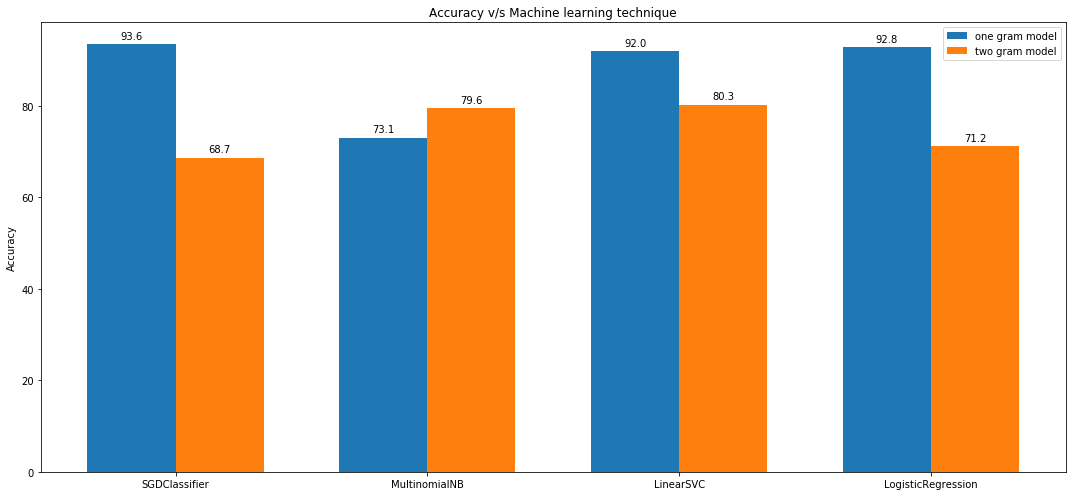

In [310]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['SGDClassifier', 'MultinomialNB', 'LinearSVC', 'LogisticRegression']
one_acc = [93.6, 73.1, 92.0, 92.8]
two_acc = [68.7, 79.6, 80.3, 71.2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2, one_acc, width, label='one gram model')
rects2 = ax.bar(x + width/2, two_acc, width, label='two gram model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy v/s Machine learning technique')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## *Approach B - Unsupervised method*

***As we don't have labelled dataset in this case, we are supposed to do the cluster analysis in order to obtain the major topics discussed by the twitter users. This can be done by clustering methods like - hierarchical clustering/ kmeans. Once we are done with our data pre-processing steps, we can vectorize our data i.e converting into numerical data. This numerical data is fed into a clustering model which predicts the category of each tweet. In this way, we classified our original dataset into 6 major topics called- 'sports,politics,travel/events,others,tvshows/music',climate.***

In [68]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction

In [140]:
# Text pre processing to reduce complexity

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    num_free = "".join(i for i in punc_free if not i.isdigit())
    http_free= " ".join(ch for ch in num_free.split() if ch not in re.findall(r"http\w+",num_free))
    stemmed= " ".join(stemmer.stem(ch) for ch in http_free.split() if re.search('[a-zA-Z]', ch))
    return stemmed
post_corpus = [clean(post.iloc[i,5]) for i in range(0, post.shape[0])]

**To reduce the complexity, we are considering a subset of the original dataset**

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.001, use_idf=True, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(train.iloc[0:5000,0]) #fit the vectorizer

print(tfidf_matrix.shape)

Wall time: 1.19 s
(5000, 4243)


In [263]:
# getting the features involved
terms = tfidf_vectorizer.get_feature_names()

In [264]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1-cosine_similarity(tfidf_matrix)

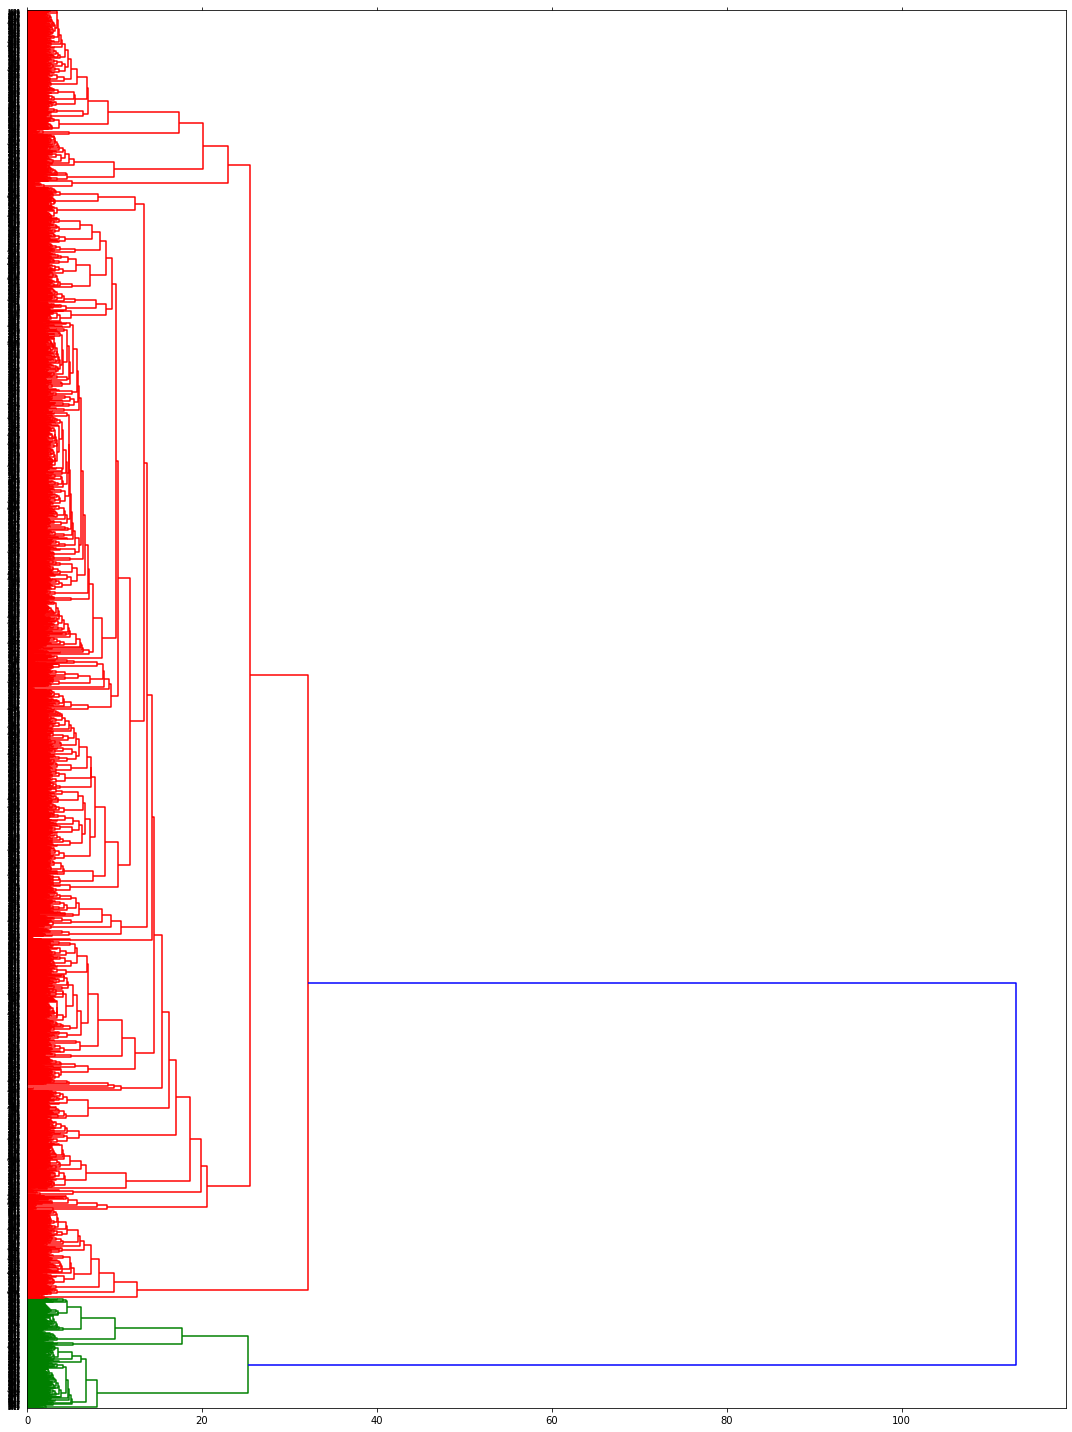

In [265]:
# Plotting the dendrogram 
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure 

In [192]:
# classifying the dataset via heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=6,affinity="euclidean",linkage="ward")
clust=cluster.fit_predict(tfidf_matrix.toarray())

In [290]:
# classifying the dataset via kmeans clustering
from sklearn.cluster import KMeans

num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clust = km.labels_.tolist()

Wall time: 25.3 s


In [291]:
c1,c2,c3,c4,c5,c6= [],[],[],[],[],[]
for j,i in enumerate(clust):
    if(i==0):
        c1.append(train.iloc[j,0])
    elif(i==1):
        c2.append(train.iloc[j,0])
    elif(i==2):
        c3.append(train.iloc[j,0])
    elif(i==3):
        c4.append(train.iloc[j,0])
    elif(i==4):
        c5.append(train.iloc[j,0])
    elif(i==5):
        c6.append(train.iloc[j,0])

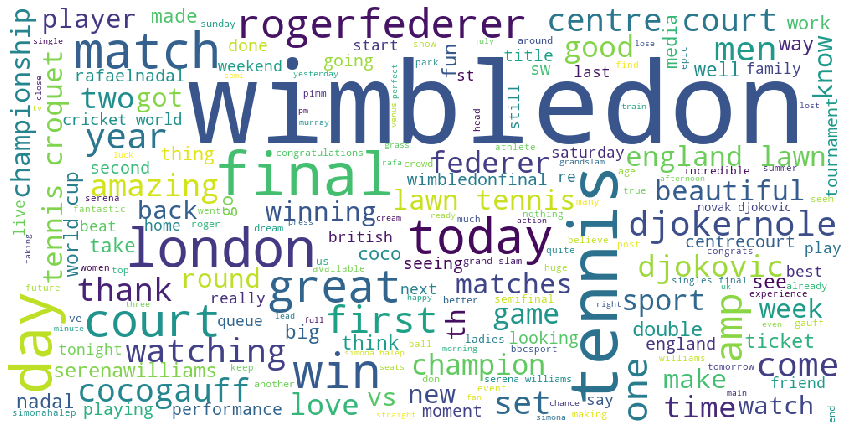

In [292]:
#Plotting wordcloud for hashtagged words/topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(c1))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

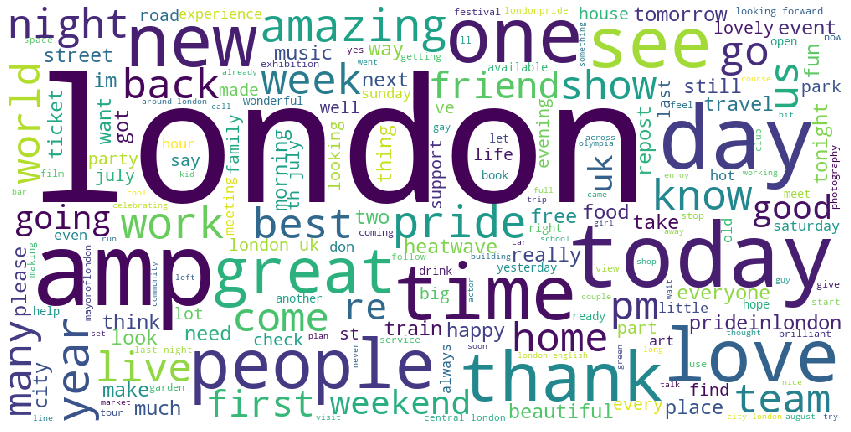

In [293]:
#Plotting wordcloud for hashtagged words/topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(c2))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

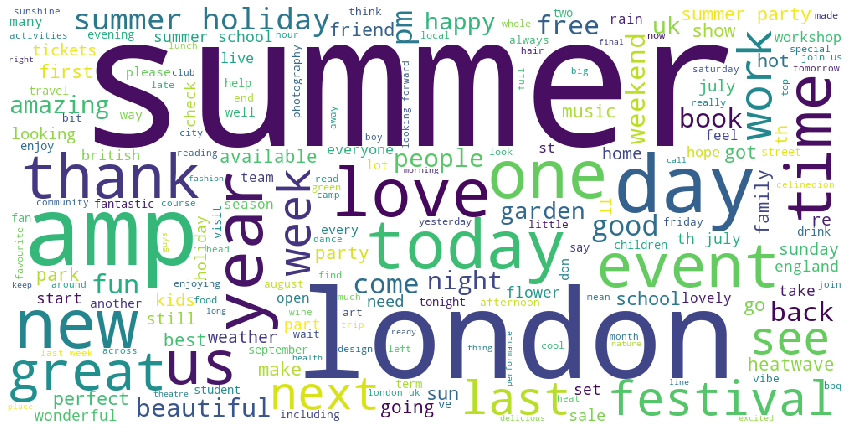

In [294]:
#Plotting wordcloud for hashtagged words/topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(c3))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

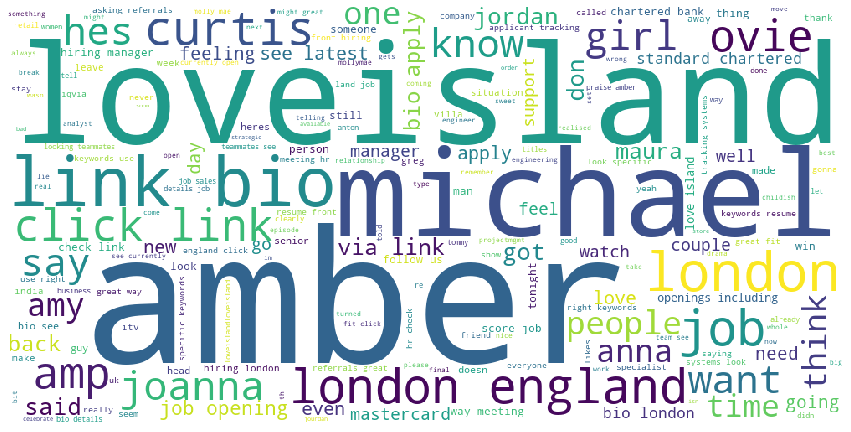

In [295]:
#Plotting wordcloud for hashtagged words/topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(c4))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

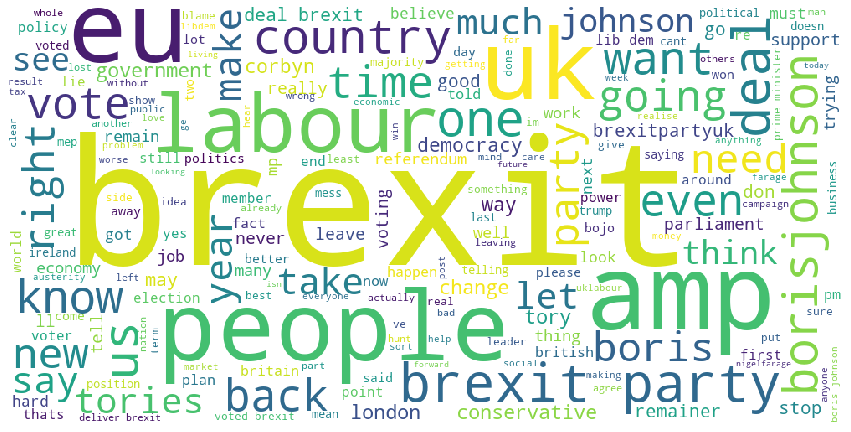

In [296]:
#Plotting wordcloud for hashtagged words/topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(c5))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

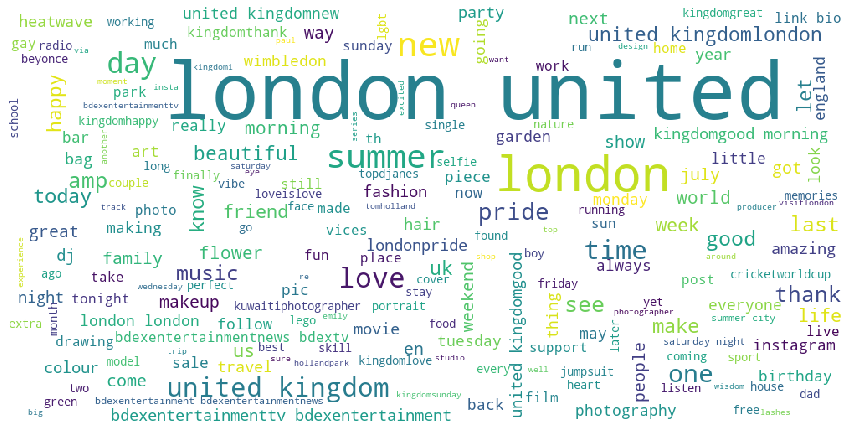

In [311]:
#Plotting wordcloud for hashtagged words/topics
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(c6))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### *From the above word clouds of all 6 clusters, we can make following conclusions*

 + cluster 1 belongs to Sports
 + cluster 2 belongs to Travel/Events
 + cluster 3 belongs to Climate
 + cluster 4 belongs to Tv shows/Music
 + cluster 5 belongs to Politics
 + cluster 6 belongs to Others


In [315]:
# Sentiment Analysis using Vader : 
tvshow,sports,politics,others,climate,events= pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
ind=[c4,c1,c5,c6,c3,c2]
nameind=["tvshow","sports","politics","others","climate","travel/events"]
datfrm=[tvshow,sports,politics,others,climate,events]

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for j in range(0,6):
    for i in ind[j]:

        snt = analyzer.polarity_scores(i)

        temp = pd.DataFrame({'Comments': i, 'Polarity': list(snt.items())[3][1]}, index = [0])

        datfrm[j] = datfrm[j].append(temp)    

    negative_count=0
    positive_count=0

    for i in range(0,len(ind[j])):
        if(float(datfrm[j].iloc[i,1])<0.0):
            negative_count=negative_count+1 #getting the count of negative tweets
        elif(float(datfrm[j].iloc[i,1])>0.0):
            positive_count=positive_count+1  #getting the count of positive tweets
 
    # favours 
    print("% of tweets : ",(positive_count*100)/len(ind[j]),", which favour ",nameind[j])
    
    # disfavours 
    print("% of tweets : ",(negative_count*100)/len(ind[j]),", which disfavour ",nameind[j])
    
    # neutralopinion 
    print("% of tweets : ",((len(ind[j])-positive_count-negative_count)*100)/len(ind[j]),", which have neutral view on ",nameind[j])

% of tweets :  72.75747508305648 , which favour  tvshow
% of tweets :  20.26578073089701 , which disfavour  tvshow
% of tweets :  6.976744186046512 , which have neutral view on  tvshow
% of tweets :  72.14484679665738 , which favour  sports
% of tweets :  10.027855153203342 , which disfavour  sports
% of tweets :  17.827298050139277 , which have neutral view on  sports
% of tweets :  48.175182481751825 , which favour  politics
% of tweets :  45.07299270072993 , which disfavour  politics
% of tweets :  6.751824817518248 , which have neutral view on  politics
% of tweets :  97.71573604060913 , which favour  others
% of tweets :  1.7766497461928934 , which disfavour  others
% of tweets :  0.5076142131979695 , which have neutral view on  others
% of tweets :  80.08298755186722 , which favour  climate
% of tweets :  7.19225449515906 , which disfavour  climate
% of tweets :  12.72475795297372 , which have neutral view on  climate
% of tweets :  67.85046728971963 , which favour  travel/events

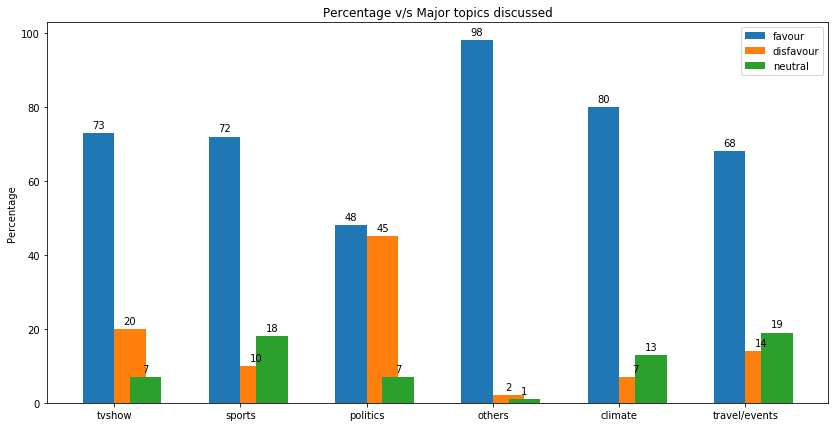

In [316]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ["tvshow","sports","politics","others","climate","travel/events"]
favour = [73,72,48,98,80,68]
disfavour = [20,10,45,2,7,14]
neutral = [7,18,7,1,13,19]
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - width/2, favour, width, label='favour')
rects2 = ax.bar(x + width/2, disfavour, width, label='disfavour')
rects3 = ax.bar(x + width, neutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage v/s Major topics discussed')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

***From the above plot, it is evident that politics is the category which has most negative sentiment among twitter users. This conclusion matches with the one which we got from approach A : supervised method.***